# Cognifyz Internship-Level 1
# Task 1-Data Exploration and Preprocessing

1. Explore the dataset and identify the number of rows and columns.Check for missing values in each column and handle them accordingly.Perform data type conversion if necessary.Analyze the distribution of the target variable("Aggregate rating") and identify any class imbalances.

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the dataset

In [3]:
df=pd.read_csv("data.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## 3. Data Exploration

In [5]:
df.shape

(9551, 21)

Comment: 

- There are 9551 rows and 21 instances for the dataset.

In [7]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Comment :

- Feature 'cuisines' has null values.
  
- Country code is of categorical in nature eventhough stored as interger.


In [10]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Comments:

- There is a huge difference between maximum and minimum value for the features Average cost for two and votes which implies presence of extreme outliers.

- Mean is much greater than median for the features average cost for two and votes which indicates they are right skewed.

In [12]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [13]:
df['Price range'].unique()

array([3, 4, 2, 1], dtype=int64)

In [14]:
df['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [15]:
df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

Comment:
- 'Price Range' is an ordinal feature representing price levels from low to high ie 1 to 4, so no further encoding is required.
- 'Rating Text' and 'Rating Color' are also ordinal features.They represents restaurant rating range.These will be mapped to numeric values or encoded.


In [17]:
df['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['Is delivering now'].unique()

array(['No', 'Yes'], dtype=object)

Comment :
- The features 'Has Table Booking','Has Online delivery','Is delivering now' is of categorical in nature with values 'Yes' and 'No'.For better understanding and readability
it can be  mapped using as 'Yes'-1 and 'No'-0.

## 4. Datapreprocessing

In [22]:
df=df.drop('Switch to order menu',axis=1)     # Dropping feature as it does not contribute anything for analysis
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229


In [24]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [28]:
# Removing special characters
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.replace(r'[^a-zA-Z0-9 ]+', '', regex=True)

In [35]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [41]:
df[df['Cuisines'].isnull()]       # Field with null value

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,115 N Jackson St Albany GA 31701,Albany,Albany Albany,-84.154000,31.577200,NaN,0,Dollar,No,No,No,1,3.4,Orange,Average,34
87,17284211,Pearlys Famous Country Cookng,216,Albany,814 N Slappey Blvd Albany GA 31701,Albany,Albany Albany,-84.175900,31.588200,NaN,0,Dollar,No,No,No,1,3.4,Orange,Average,36
94,17284158,Jimmies Hot Dogs,216,Albany,204 S Jackson St Albany GA 31701,Albany,Albany Albany,-84.153400,31.575100,NaN,10,Dollar,No,No,No,1,3.9,Yellow,Good,160
297,17374552,Corkscrew Cafe,216,Gainesville,51 W Main St Dahlonega GA 30533,Dahlonega,Dahlonega Gainesville,-83.985800,34.531800,NaN,40,Dollar,No,No,No,3,3.9,Yellow,Good,209
328,17501439,Dovetail,216,Macon,543 Cherry St Macon GA 31201,Macon,Macon Macon,-83.627979,32.836410,NaN,40,Dollar,No,No,No,3,3.8,Yellow,Good,102
346,17606621,HI Lite Bar Lounge,216,Miller,109 N Broadway Ave Miller SD 57362,Miller,Miller Miller,-98.989100,44.515800,NaN,0,Dollar,No,No,No,1,3.4,Orange,Average,11
368,17059060,Hillstone,216,Orlando,215 South Orlando Avenue Winter Park FL 32789,Winter Park,Winter Park Orlando,-81.365260,28.596682,NaN,40,Dollar,No,No,No,3,4.4,Green,Very Good,1158
418,17142698,Leonards Bakery,216,Rest of Hawaii,933 Kapahulu Ave Honolulu HI 96816,Kaimuki,Kaimuki Rest of Hawaii,-157.813432,21.284586,NaN,10,Dollar,No,No,No,1,4.7,Dark Green,Excellent,707
455,17616465,Tybee Island Social Club,216,Savannah,1311 Butler Ave Tybee Island GA 31328,Tybee Island,Tybee Island Savannah,-80.848297,31.995810,NaN,10,Dollar,No,No,No,1,3.9,Yellow,Good,309


In [42]:
df.dropna(subset=['Cuisines'],inplace=True)  # Drops rows with null values in the feature 'Cuisines'

In [44]:
df.isnull().sum()                           # Rechecking for null values

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [46]:
df.duplicated().sum()                   # Checking for duplicate rows

0

In [51]:
df['Aggregate rating'].value_counts(normalize=True)

Aggregate rating
0.0    0.225110
3.2    0.054706
3.1    0.054391
3.4    0.051876
3.3    0.050618
3.5    0.050304
3.0    0.049046
3.6    0.047998
3.7    0.044750
3.8    0.041815
2.9    0.039929
3.9    0.034794
2.8    0.033012
4.1    0.028715
4.0    0.027877
2.7    0.026200
4.2    0.023161
2.6    0.020017
4.3    0.018235
4.4    0.014986
2.5    0.011528
4.5    0.009956
2.4    0.009118
4.6    0.008174
4.9    0.006393
2.3    0.004926
4.7    0.004297
2.2    0.002830
4.8    0.002620
2.1    0.001572
2.0    0.000734
1.9    0.000210
1.8    0.000105
Name: proportion, dtype: float64

Text(0, 0.5, 'Count')

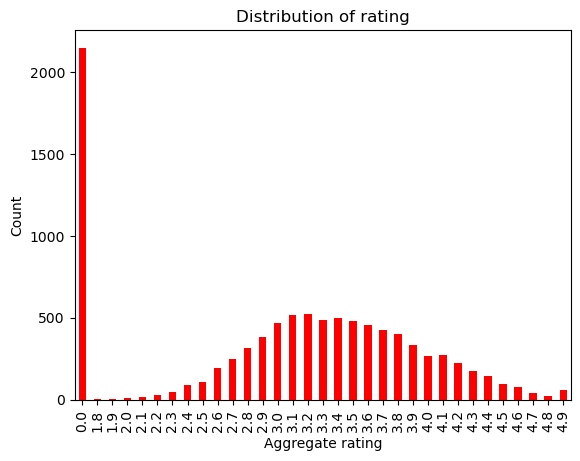

In [53]:
# Visualization of target variable "Aggregate Rating"
df['Aggregate rating'].value_counts().sort_index().plot(kind='bar',color='red')
plt.title("Distribution of rating")
plt.ylabel("Count")

In [54]:
df['Aggregate rating'].describe()

count    9542.000000
mean        2.665238
std         1.516588
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

**Conclusion:**

- Majority of the customers have not rated the restaurants or missing.
- Most of the customers have given rating between 3-3.5.
- Restaurants with very less and very high rating  is fewer.
- Given dataset is highly imbalanced which can lead the ML model to bias. We have to apply SMOTE Technique for handling class imbalance.